<a href="https://colab.research.google.com/github/karmanandan/Image-Classification-with-NN-RF/blob/main/ImageClassification_CNN_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to classify images with less data in Neural Networks**

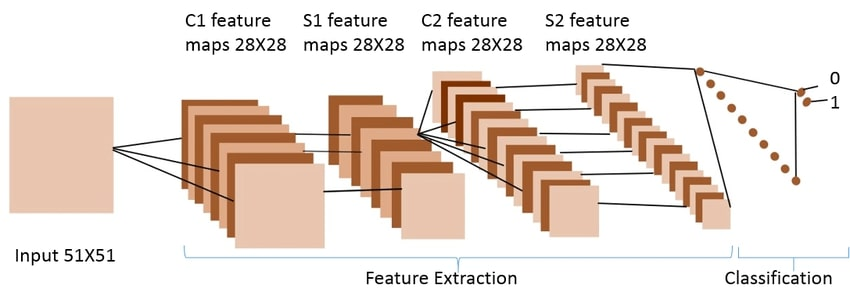

##### Warning: Dimensions are different from showing in image.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !unzip /content/drive/MyDrive/colab_datasets/birds_dataset.zip -d /content/drive/MyDrive/

In [3]:
import os
import glob
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [4]:
print(os.listdir('/content/drive/MyDrive/birds_dataset'))

['train', 'valid']


In [5]:
os.chdir('/content/drive/MyDrive/birds_dataset')

In [6]:
SIZE = 128

train_images = []
train_labels = [] 
for directory_path in glob.glob("train/*"):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        try:
          img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
          img = cv2.resize(img, (SIZE, SIZE))
          img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
          train_images.append(img)
          train_labels.append(label)
        except:
          break
        
train_images = np.array(train_images)
train_labels = np.array(train_labels) 

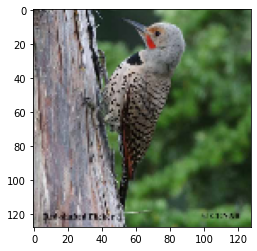

In [7]:
plt.imshow(train_images[5]);

In [8]:
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("valid/*"):
    fruit_label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        try:
          img = cv2.resize(img, (SIZE, SIZE))
          img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
          test_images.append(img)
          test_labels.append(fruit_label)
        except:
          break
      
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [9]:
#Encode labels from text to integers.
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
activation = 'softmax'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'random_normal'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'random_normal'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'random_normal'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [13]:
#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'random_normal')(x)
prediction_layer = Dense(2, activation = 'sigmoid')(x)

# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0     

In [14]:
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50,
                        validation_data = (x_test, y_test_one_hot))

Epoch 1/50
3/3 [==============================] - 28s 9s/step - loss: 0.6892 - accuracy: 0.5934 - val_loss: 0.7054 - val_accuracy: 0.3000
Epoch 2/50
3/3 [==============================] - 17s 5s/step - loss: 0.6849 - accuracy: 0.5934 - val_loss: 0.7084 - val_accuracy: 0.3000
Epoch 3/50
3/3 [==============================] - 13s 5s/step - loss: 0.6728 - accuracy: 0.5934 - val_loss: 0.7103 - val_accuracy: 0.3000
Epoch 4/50
3/3 [==============================] - 12s 4s/step - loss: 0.6496 - accuracy: 0.6264 - val_loss: 0.7107 - val_accuracy: 0.3000
Epoch 5/50
3/3 [==============================] - 13s 4s/step - loss: 0.6311 - accuracy: 0.7253 - val_loss: 0.7093 - val_accuracy: 0.3000
Epoch 6/50
3/3 [==============================] - 14s 4s/step - loss: 0.6237 - accuracy: 0.7253 - val_loss: 0.7079 - val_accuracy: 0.3000
Epoch 7/50
3/3 [==============================] - 14s 4s/step - loss: 0.6221 - accuracy: 0.7473 - val_loss: 0.7061 - val_accuracy: 0.3000
Epoch 8/50
3/3 [==================

In [15]:
# validation accuracy is constant in all epochs, What it means?
#### Reasons ####
# 1. Model has reached its optimal performance
# 2. Overfitting
# 3. Data quality

#### Solutions ####
# 1. Simplify the model
# 2. Regularization
# 3. Data augmentation
# 4. Change the optimizer or learning rate
# 5. Increase the size of the dataset

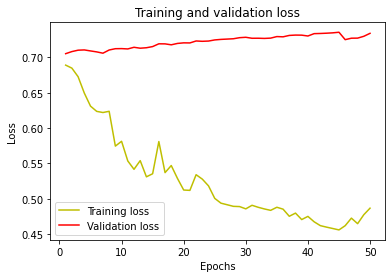

In [16]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

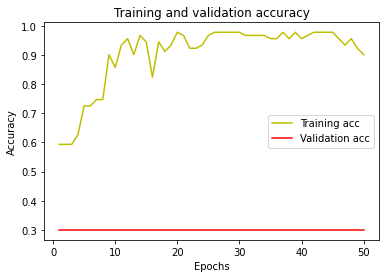

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

1/1 [==============================] - 1s 1s/step


In [19]:
test_labels

array(['flicker', 'flicker', 'flicker', 'flicker', 'flicker', 'flicker',
       'flicker', 'flicker', 'flicker', 'flicker', 'flicker', 'flicker',
       'flicker', 'flicker', 'flicker', 'flicker', 'flicker', 'flicker',
       'flicker', 'flicker', 'flicker', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird'], dtype='<U12')

In [20]:
prediction_NN

array(['sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird'], dtype='<U12')

In [21]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)

[[ 0 21]
 [ 0  9]]


<AxesSubplot:>

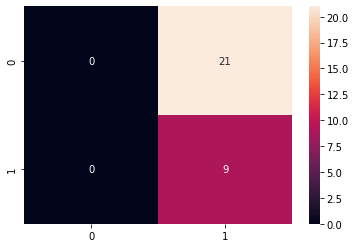

In [22]:
sns.heatmap(cm, annot=True)

In [23]:
print("Neural Network Accuracy = ", accuracy_score(test_labels, prediction_NN))

Neural Network Accuracy =  0.3


In [24]:
# accuracy is not an important metric for imbalanced data

In [25]:
print(classification_report(test_labels, prediction_NN))

              precision    recall  f1-score   support

     flicker       0.00      0.00      0.00        21
sparrow_bird       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 57ms/step
The prediction for this image is:  ['sparrow_bird']
The actual label for this image is:  flicker


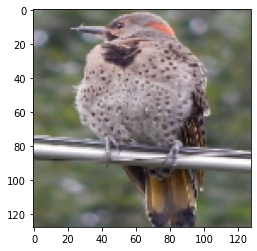

In [26]:
n=5 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [27]:
#Now, let us use features from convolutional network for RF
X_for_RF = feature_extractor.predict(x_train) #This is out X input to RF

3/3 [==============================] - 3s 913ms/step


In [28]:
#RANDOM FOREST
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(random_state=42)

In [29]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

1/1 [==============================] - 1s 912ms/step


In [30]:
prediction_RF

array(['sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'flicker', 'flicker', 'sparrow_bird', 'flicker', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'flicker', 'sparrow_bird',
       'sparrow_bird', 'flicker', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'sparrow_bird', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird', 'flicker', 'sparrow_bird', 'sparrow_bird',
       'sparrow_bird'], dtype='<U12')

In [31]:
#Print overall accuracy
print("Accuracy = ", accuracy_score(test_labels, prediction_RF))

Accuracy =  0.43333333333333335


In [32]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
print(cm)

[[ 5 16]
 [ 1  8]]


<AxesSubplot:>

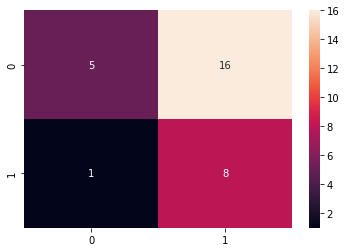

In [33]:
sns.heatmap(cm, annot=True)

In [34]:
print(classification_report(test_labels, prediction_RF))

              precision    recall  f1-score   support

     flicker       0.83      0.24      0.37        21
sparrow_bird       0.33      0.89      0.48         9

    accuracy                           0.43        30
   macro avg       0.58      0.56      0.43        30
weighted avg       0.68      0.43      0.40        30



1/1 [==============================] - 0s 122ms/step
The prediction for this image is:  ['sparrow_bird']
The actual label for this image is:  flicker


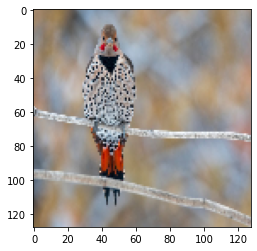

In [43]:
n=10 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
test_prediction_RF = RF_model.predict(input_img_features)[0] 
test_prediction_RF = le.inverse_transform([test_prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", test_prediction_RF)
print("The actual label for this image is: ", test_labels[n])

# **VGG16+RF**

In [36]:
from keras.applications.vgg16 import VGG16

In [37]:
#############################
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [38]:
#Now, let us use features from convolutional network for RF
feature_extractor_vgg=VGG_model.predict(x_train)

features = feature_extractor_vgg.reshape(feature_extractor_vgg.shape[0], -1)

X_for_RF = features #This is our X input to RF

3/3 [==============================] - 20s 6s/step


In [39]:
#RANDOM FOREST
VGG_RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
VGG_RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
vgg_prediction_RF = VGG_RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
vgg_prediction_RF = le.inverse_transform(vgg_prediction_RF)

1/1 [==============================] - 5s 5s/step


In [40]:
#Print overall accuracy
print ("Accuracy = ", accuracy_score(test_labels, vgg_prediction_RF))

Accuracy =  0.6333333333333333


<AxesSubplot:>

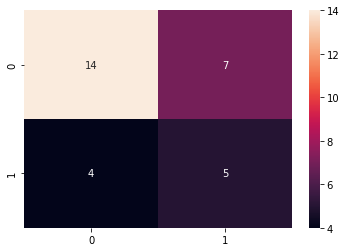

In [41]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, vgg_prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 210ms/step
The prediction for this image is:  ['flicker']
The actual label for this image is:  flicker


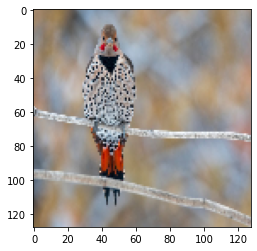

In [42]:
#Check results on a few select images
n=10
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
single_vgg_prediction_RF = VGG_RF_model.predict(input_img_features)[0] 
single_vgg_prediction_RF = le.inverse_transform([single_vgg_prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", single_vgg_prediction_RF)
print("The actual label for this image is: ", test_labels[n])